In [1]:
import sys
!{sys.executable} -m pip install transformers
!{sys.executable} -m pip install astunparse
!{sys.executable} -m pip install termcolor

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Load the dataset

In [2]:
import os
import pandas as pd

PATH_TO_CWD = os.getcwd().split('monolingual_arabic_bert')[0]
PATH_TO_ARABIC_TWEETS = PATH_TO_CWD + 'data/preprocessed/arabic/'

# Load the dataset into a pandas dataframe.
df = pd.read_csv(PATH_TO_ARABIC_TWEETS + "arabic_test_tweets.csv")

# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df.shape[0]))

# Display 10 random rows from the data.
df.sample(10)

Number of training sentences: 3,353



,id,sentiment,original,preprocessed
2672,780714353360273408,positive,@afra76 👍🏼من جد غوتشي وفندي خطيرين هالموسم,👍 🏼من جد غوتشي وفندي خطيرين هالموسم
983,785969884534566912,neutral,طلبت هارديسك خارجي من امازون (52$)و جاني ذا ال...,طلبت هارديسك خارجي من امازون 52$)و جاني ذا الشي
1564,785966693050937344,neutral,اتوقع باقي انا وكم شخص للحين ماحملنا لعبة بوكي...,اتوقع باقي انا وكم شخص للحين ماحملنا لعبة بوكي...
601,785630223131893760,neutral,RT @mh_awadi: #مصر في الأخبار :أغذية ملوثةأكل ...,مصر في الأخبار أغذية ملوثةأكل لحوم الحميرإعتقا...
237,785226546772598790,negative,مدرسة في مصر تعلم طلابها: إسرائيل طيبة القلب! ...,مدرسة في مصر تعلم طلابها إسرائيل طيبة القلب
1307,785183327263207424,positive,نجم برشلونة السابق ينقذ ميلان من شبح الاصابة: ...,نجم برشلونة السابق ينقذ ميلان من شبح الاصابة م...
2735,784981945335808000,positive,RT @mairam100: اللي فوق مصممة أميركية، تمنح ال...,اللي فوق مصممة أميركية تمنح الأحذية النايك لمس...
2219,785989059298615296,positive,RT @HaifaAlajlan_: اللهم لا تخرجنا من رمضان إل...,اللهم لا تخرجنا من رمضان إلا وقد أصلحت حالنا و...
3053,785441291500920832,positive,@Bankerchy ههههههههههههههه اي ذكرني بعيد ميلاد...,ههههههههههههههه اي ذكرني بعيد ميلادك اجيب لك ن...
2761,784881048438054913,neutral,حط على غوغل كلمة حلب بيطلعلك بس مباشر بتلاقي و...,حط على غوغل كلمة حلب بيطلعلك بس مباشر بتلاقي و...


In [3]:
# perform the following sentiment value mapping in the dataframe
# positive = 1; negative = 2; neutral = 0
df['sentiment'].replace({'positive': 1, 'negative': 2, 'neutral': 0}, inplace=True)

In [4]:
# sanity check
df.sample(5)

,id,sentiment,original,preprocessed
2198,785630138461487104,1,RT @ferial_soof: _يارب لا تجعل رمضان يرحل وَنح...,يارب لا تجعل رمضان يرحل وَنحن منسيون من الجنة ...
2052,785992427492499457,2,#جبهه_شعب_مصر هذه ماكانت مناظرة تلك كانت مسخر...,جبهه_شعب_مصر هذه ماكانت مناظرة تلك كانت مسخررر...
1373,785968738294173696,0,RT @RotanaMagz: #أهلي_جدة السعودي يواجه #برشلو...,أهلي_جدة السعودي يواجه برشلونة وديا في قطر كور...
1114,785268394526445568,1,@malak_alhusaini الله يسعدك ويوفقك ويحقق مرادك...,الله يسعدك ويوفقك ويحقق مرادك ابغا ايفون الله ...
470,785992663065583616,2,#اردوغان وعصابتة توعدوا وهددوا بأن عدم تسليم #...,اردوغان وعصابتة توعدوا وهددوا بأن عدم تسليم غو...


In [5]:
# keep last 10% of values for testing and 90% for training
test_size = int(len(df)*0.1)

train_df = df[:-test_size]
test_df = df[len(train_df):]

Extract the tweets and their labels

In [6]:
# Get the lists of sentences and their labels.
sentences = train_df.preprocessed.values
labels = train_df.sentiment.values

Tokenize the input

In [7]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading arabic BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained("asafaya/bert-base-arabic")

# Print the original sentence.
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

Loading arabic BERT tokenizer...
 Original:  إجبار أبل على التعاون على فك شفرة اجهزتها
Tokenized:  ['اجبار', 'ابل', 'على', 'التعاون', 'على', 'فك', 'شفر', '##ة', 'اجهز', '##تها']
Token IDs:  [26489, 5944, 1747, 4666, 1747, 4556, 28245, 1012, 23637, 2095]


Tokenize the entire dataset

In [8]:
max_len = 0

# For every sentence...
for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  115


In [9]:
import torch

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr4/cs542/rnasr/.local/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:2074: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:  إجبار أبل على التعاون على فك شفرة اجهزتها
Token IDs: tensor([    2, 26489,  5944,  1747,  4666,  1747,  4556, 28245,  1012, 23637,
         2095,     3,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0])


Training and validation split. Seeing that this dataset is small use 90% for training and 10% for validation.

In [10]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

2,716 training samples
  302 validation samples


In [11]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

Now the fun begins, start training our classification model! Load the pre-trained monolingual arabic BERT.

In [12]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained("asafaya/bert-base-arabic", num_labels = 3)

Some weights of the model checkpoint at asafaya/bert-base-arabic were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at asafaya/bert-base-ar

Setting Adam Optimizer

In [13]:
from transformers import AdamW

# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [14]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 4

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

Setting the training loop

In [15]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [16]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [17]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0]
        b_input_mask = batch[1]
        b_labels = batch[2]

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # In PyTorch, calling `model` will in turn call the model's `forward` 
        # function and pass down the arguments. The `forward` function is 
        # documented here: 
        # https://huggingface.co/transformers/model_doc/bert.html#bertforsequenceclassification
        # The results are returned in a results object, documented here:
        # https://huggingface.co/transformers/main_classes/output.html#transformers.modeling_outputs.SequenceClassifierOutput
        # Specifically, we'll get the loss (because we provided labels) and the
        # "logits"--the model outputs prior to activation.
        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0]
        b_input_mask = batch[1]
        b_labels = batch[2]
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            result = model(b_input_ids, 
                           token_type_ids=None, 
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        # Get the loss and "logits" output by the model. The "logits" are the 
        # output values prior to applying an activation function like the 
        # softmax.
        loss = result.loss
        logits = result.logits
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 4 ========
Training...
  Batch    40  of     85.    Elapsed: 0:04:38.
  Batch    80  of     85.    Elapsed: 0:09:14.

  Average training loss: 0.88
  Training epcoh took: 0:09:47

Running Validation...
  Accuracy: 0.59
  Validation Loss: 0.82
  Validation took: 0:00:19

======== Epoch 2 / 4 ========
Training...
  Batch    40  of     85.    Elapsed: 0:04:36.
  Batch    80  of     85.    Elapsed: 0:09:11.

  Average training loss: 0.65
  Training epcoh took: 0:09:45

Running Validation...
  Accuracy: 0.68
  Validation Loss: 0.74
  Validation took: 0:00:19

======== Epoch 3 / 4 ========
Training...
  Batch    40  of     85.    Elapsed: 0:04:35.
  Batch    80  of     85.    Elapsed: 0:09:10.

  Average training loss: 0.47
  Training epcoh took: 0:09:44

Running Validation...
  Accuracy: 0.71
  Validation Loss: 0.77
  Validation took: 0:00:19

======== Epoch 4 / 4 ========
Training...
  Batch    40  of     85.    Elapsed: 0:04:35.
  Batch    80  of     85.    Elapsed: 0:

Let's view a summary of our training process

In [18]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.88,0.82,0.59,0:09:47,0:00:19
2,0.65,0.74,0.68,0:09:45,0:00:19
3,0.47,0.77,0.71,0:09:44,0:00:19
4,0.35,0.80,0.69,0:09:43,0:00:19


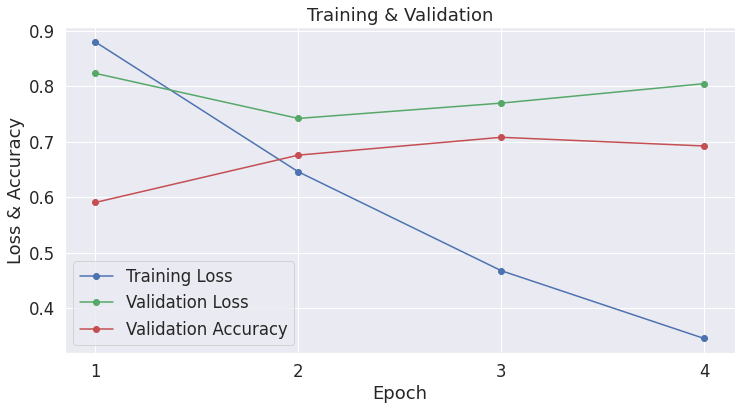

In [22]:
import matplotlib.pyplot as plt
# % matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training Loss")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation Loss")
plt.plot(df_stats['Valid. Accur.'], 'r-o', label="Validation Accuracy")

# Label the plot.
plt.title("Training & Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss & Accuracy")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

Check the performance on test set

In [23]:
import pandas as pd

# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(test_df.shape[0]))

# Create sentence and label lists
sentences = test_df.preprocessed.values
labels = test_df.sentiment.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 32  

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Number of test sentences: 335



/usr4/cs542/rnasr/.local/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:2074: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [36]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model(b_input_ids, 
                     token_type_ids=None, 
                     attention_mask=b_input_mask,
                     return_dict=True)

  logits = result.logits

  # Move logits and labels to CPU
  logits = logits.numpy()
  label_ids = b_labels.numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 335 test sentences...
    DONE.


In [47]:
flat_predictions = [item for sublist in predictions for item in sublist]

In [48]:
flat_predictions = np.array(flat_predictions)

print(flat_predictions.shape)

(335, 3)


In [49]:
flat_ground_truth = [item for sublist in true_labels for item in sublist]

In [50]:
flat_ground_truth = np.array(flat_ground_truth)

print(flat_ground_truth.shape)

(335,)


Accuracy on Test set

In [52]:
print(np.sum( flat_predictions.argmax(1) == flat_ground_truth )/len(flat_ground_truth))

0.6567164179104478
